## MIE 1624 assignment 2 Yao Tong 1007410295

## Q1 Data Cleaning

In [30]:
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn

In [31]:
# set environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# change the size of program output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [32]:
df = pd.read_csv('clean_kaggle_data_2020.csv', low_memory = False)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

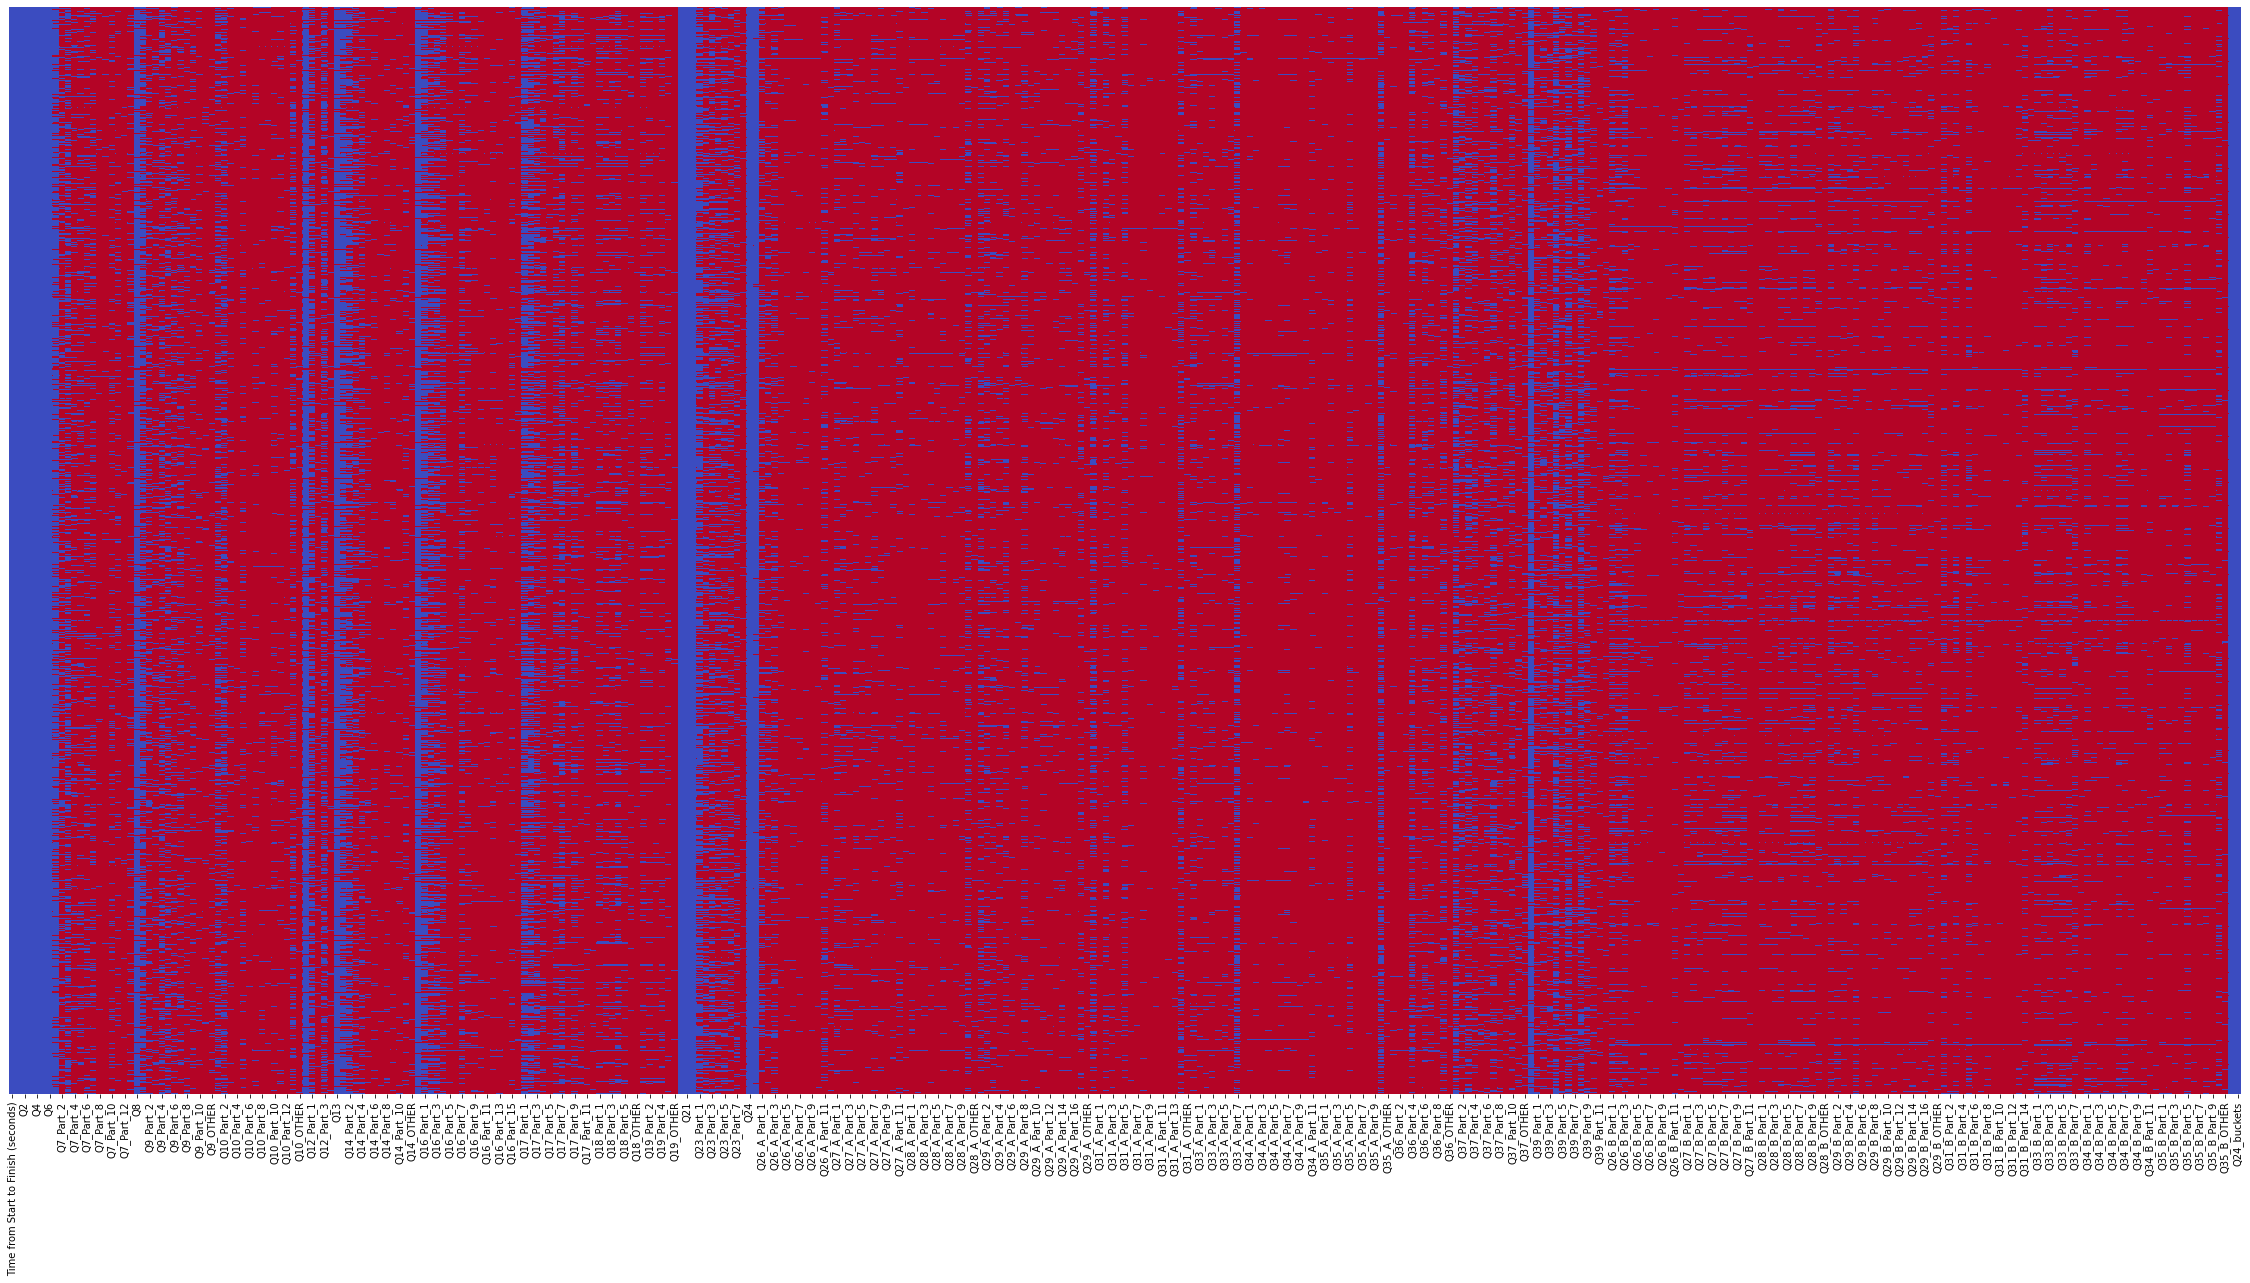

In [33]:
# look at the number of missing data using a heatmap
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

In [34]:
# report the number of all features' null values
null_df = pd.DataFrame(df.isnull().sum(axis=0), columns = ['number_of_null_values'])
null_df_sorted = null_df.sort_values(by = 'number_of_null_values',ascending=False)

print(null_df_sorted.shape)
null_df_sorted

(357, 1)


,number_of_null_values
Q34_A_Part_9,10685
Q18_OTHER,10681
Q27_B_OTHER,10675
Q28_B_OTHER,10675
Q31_A_Part_9,10673
Q35_A_Part_4,10672
Q31_A_Part_12,10668
Q19_OTHER,10666
Q10_Part_6,10665
Q35_A_Part_6,10663


#### Discussion for null value result:

There are so many teatures with over half values are null.These features can be one choice in a multiple choice question such as question 7 which support 13 features in this dataset. Most of these features owned very high null values such as Q7_Part_12 has 10626 null values, because people may select the other choices in this question. This might be a big challenge in data cleaning and feature selection. We ignore these features at this time.

Now, for the spare low null value features may used in the future data analyzation. I select Q1,2,3,4,5,6,8,11,13,15,20,21,22,24,Q24_Encoded,Q24_buckets,25,38 as features in simple question data.

Then think about whether we need to encod the non-null feactures.Based on the index of these features. I select different feature engineering methods on categorical data. For example, feature Q1 has 11 types of years level which increase from 18 to over 70. I use label encoding to label them into two new features named Q1_encoded and Q1_buckets. Q1_encoded has 11 categorical labels from 0 to 10 which can be used in the future data analyzation.

For another type of encoding method: dummy encoding. feature Q3 has categorical data with different countries. I use dummy encoding to create dummy features for categorical data in this feature. However in Q3 there are too many countries, if dunmmy encode all categorical data will increase the programming workload.Based on the report of country counts list. I build dummy features for coutries whose counts over 150, the other categorical country data build a feature named other. 

After looking all the non-null feactures these question features just need to be encoded: Q1,2,3,4,5,6,20,21,22.

### Encoding non-null feactures 

#### Encoding feature Q1

In [35]:
# encode the Q1 featurevalues by label encoding method

# report how many kinds of categorical labels are in this feature
print(df.Q1.unique() )

['What is your age (# years)?' '30-34' '35-39' '22-24' '55-59' '50-54'
 '25-29' '18-21' '40-44' '60-69' '45-49' '70+']


In [36]:
# build Q1 buckets dictionary with all encoded label
Q1_buckets = {"18-21":"18-21","22-24":"22-24","25-29":"25-29","30-34":"30-34","35-39":"35-39","40-44":"40-44",
              "45-49":"45-49","50-54":"50-54","55-59":"55-59","60-69":"60-69","70+":"70+"}
# build Q1 encoded dictionary with all encoded label
Q1_encoded = {"18-21":0,"22-24":1,"25-29":2,"30-34":3,"35-39":4,"40-44":5,"45-49":6,"50-54":7,"55-59":8,"60-69":9,"70+":10}

df.loc[1:,'Q1_Encoded'] = df.loc[1:,'Q1'].map(Q1_encoded)
df.Q1_Encoded.unique()

array([nan,  3.,  4.,  1.,  8.,  7.,  2.,  0.,  5.,  9.,  6., 10.])

In [37]:
df.loc[1:,'Q1_buckets'] = df.loc[1:,'Q1'].map(Q1_buckets)
df.Q1_buckets.unique()

array([nan, '30-34', '35-39', '22-24', '55-59', '50-54', '25-29', '18-21',
       '40-44', '60-69', '45-49', '70+'], dtype=object)

In [38]:
df['Q1_buckets'].shape

(10730,)

#### Encoding feature Q2

In [39]:
# encode the Q2 featurevalues by dummy encoding method

#Create dummy features for each categorical feature
dummies_Q2 = pd.get_dummies(df['Q2'][1:], prefix='Q2')
dummies_Q2

,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Prefer to self-describe,Q2_Woman
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
10725,1,0,0,0,0
10726,1,0,0,0,0
10727,1,0,0,0,0
10728,1,0,0,0,0


#### Encoding feature Q3

In [40]:
country = df ['Q3']
# report counts value by countries
country_popu = country.value_counts()
print(country_popu)

India                                                   2353
United States of America                                1484
Other                                                    815
Brazil                                                   443
Japan                                                    385
Russia                                                   351
United Kingdom of Great Britain and Northern Ireland     350
Germany                                                  256
Nigeria                                                  246
Spain                                                    234
Canada                                                   198
France                                                   197
Italy                                                    184
China                                                    166
Turkey                                                   166
Australia                                                147
Mexico                  

In [41]:
# for this countries feature we get so many different countries and cannot just simply do the dummy encoding
# build dummy features for coutries whose counts over 150, the other categorical country data build a feature named other.
other_country = country.isin(country_popu.index[country_popu < 150])
df.loc[other_country,'Q3'] = "Other"
dummies_Q3 = pd.get_dummies(df['Q3'][1:], prefix='Q3')
dummies_Q3

,Q3_Brazil,Q3_Canada,Q3_China,Q3_France,Q3_Germany,Q3_India,Q3_Italy,Q3_Japan,Q3_Nigeria,Q3_Other,Q3_Russia,Q3_Spain,Q3_Turkey,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10726,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10727,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10728,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Encoding feature Q4

In [42]:
# encode the Q4 featurevalues by dummy encoding method
dummies_Q4 = pd.get_dummies(df['Q4'][1:], prefix='Q4')
dummies_Q4

,Q4_Bachelor’s degree,Q4_Doctoral degree,Q4_I prefer not to answer,Q4_Master’s degree,Q4_No formal education past high school,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree
1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
10725,0,0,1,0,0,0,0
10726,1,0,0,0,0,0,0
10727,0,0,0,1,0,0,0
10728,1,0,0,0,0,0,0


#### Encoding feature Q5

In [43]:
# encode the Q5 featurevalues by dummy encoding method
dummies_Q5 = pd.get_dummies(df['Q5'][1:], prefix='Q5')
dummies_Q5

,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Machine Learning Engineer,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10725,0,0,0,0,0,1,0,0,0,0,0
10726,0,0,0,0,0,0,1,0,0,0,0
10727,0,0,0,0,0,0,0,0,1,0,0
10728,0,0,0,0,0,0,0,0,0,1,0


#### Encoding feature Q6

In [44]:
# encode the Q6 featurevalues by label encoding method

# report how many kinds of categorical labels are in this feature
df.dropna(subset=['Q6'],inplace=True) 
print(df.Q6.unique() )

['For how many years have you been writing code and/or programming?'
 '5-10 years' '10-20 years' '1-2 years' '< 1 years' '3-5 years'
 '20+ years' 'I have never written code']


In [45]:
# build Q6 buckets dictionary with all encoded label
Q6_buckets = {"I have never written code":"never","< 1 years":"< 1","1-2 years":"1-2",
              "3-5 years":"3-5","5-10 years":"5-10", "10-20 years":"10-20", "20+ years": "20+"}
# build Q6 encoded dictionary with all encoded label
Q6_encoded = {"I have never written code":0,"< 1 years":1,"1-2 years":2,"3-5 years":3,"5-10 years":4,"10-20 years":5,"20+ years": 6}

df.loc[1:,'Q6_Encoded'] = df.loc[1:,'Q6'].map(Q6_encoded)
df.loc[1:,'Q6_buckets'] = df.loc[1:,'Q6'].map(Q6_buckets)
print(df.Q6_buckets.unique())
print(df.Q6_Encoded.unique())

[nan '5-10' '10-20' '1-2' '< 1' '3-5' '20+' 'never']
[nan  4.  5.  2.  1.  3.  6.  0.]


In [46]:
df['Q6_Encoded'].shape

(10730,)

#### Encoding feature Q20

In [47]:
# encode the Q20 featurevalues by label encoding method

# report how many kinds of categorical labels are in this feature
df.dropna(subset=['Q20'],inplace=True) 
print(df.Q20.unique() )

['What is the size of the company where you are employed?'
 '10,000 or more employees' '1000-9,999 employees' '250-999 employees'
 '0-49 employees' '50-249 employees']


In [48]:
# build Q20 buckets dictionary with all encoded label
Q20_buckets = {"0-49 employees":"0-49 employees","50-249 employees":"50-249 employees","250-999 employees":"250-999 employees",
              "1000-9,999 employees":"1000-9,999 employees","10,000 or more employees":"10,000 or more employees"}

# build Q20 encoded dictionary with all encoded label
Q20_encoded = {"0-49 employees":0,"50-249 employees":1,"250-999 employees":2,"1000-9,999 employees":3,"10,000 or more employees":4}

df.loc[1:,'Q20_Encoded'] = df.loc[1:,'Q20'].map(Q20_encoded)
df.loc[1:,'Q20_buckets'] = df.loc[1:,'Q20'].map(Q20_buckets)
print(df.Q20_buckets.unique())
print(df.Q20_Encoded.unique())

[nan '10,000 or more employees' '1000-9,999 employees' '250-999 employees'
 '0-49 employees' '50-249 employees']
[nan  4.  3.  2.  0.  1.]


In [49]:
df['Q20_Encoded'].shape

(10730,)

#### Encoding feature Q21

In [50]:
# encode the Q20 featurevalues by label encoding method

# report how many kinds of categorical labels are in this feature
df.dropna(subset=['Q21'],inplace=True) 
print(df.Q21.unique() )

['Approximately how many individuals are responsible for data science workloads at your place of business?'
 '20+' '0' '5-9' '1-2' '3-4' '10-14' '15-19']


In [51]:
# build Q21 buckets dictionary with all encoded label
Q21_buckets = {"0":"0","1-2":"1-2","3-4":"3-4","5-9":"5-9","10-14":"10-14","15-19":"15-19","20+":"20+"}

# build Q21 encoded dictionary with all encoded label
Q21_encoded = {"0":0,"1-2":1,"3-4":2,"5-9":3,"10-14":4,"15-19":5,"20+":6}

df.loc[1:,'Q21_Encoded'] = df.loc[1:,'Q21'].map(Q21_encoded)
df.loc[1:,'Q21_buckets'] = df.loc[1:,'Q21'].map(Q21_buckets)
print(df.Q21_buckets.unique())
print(df.Q21_Encoded.unique())

[nan '20+' '0' '5-9' '1-2' '3-4' '10-14' '15-19']
[nan  6.  0.  3.  1.  2.  4.  5.]


In [52]:
df['Q20_Encoded'].shape

(10730,)

#### Encoding feature Q22

In [53]:
# encode the Q22 featurevalues by dummy encoding method

df.dropna(subset=['Q22'],inplace=True) 
print(df.Q22.unique() )

['Does your current employer incorporate machine learning methods into their business?'
 'We have well established ML methods (i.e., models in production for more than 2 years)'
 'No (we do not use ML methods)'
 'We use ML methods for generating insights (but do not put working models into production)'
 'We are exploring ML methods (and may one day put a model into production)'
 'We recently started using ML methods (i.e., models in production for less than 2 years)'
 'I do not know']


In [54]:
dummies_Q22 = pd.get_dummies(df['Q22'][1:], prefix='Q22')
dummies_Q22

,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production)
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,0,0,0,0,1
...,...,...,...,...,...,...
10725,1,0,0,0,0,0
10726,0,1,0,0,0,0
10727,0,0,1,0,0,0
10728,0,0,0,0,1,0


Filling and encoding features which has null values: Q8,11,13,15,25,38.

#### Filling and encoding feature Q8

In [55]:
# report the null value dataframe in feature Q8
df[(df['Q8'].isnull())]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [56]:
program = df ['Q8']
program_popu = program.value_counts()
# report the programing language distribution
print(program_popu)

Python                                                                                                        8002
R                                                                                                              803
SQL                                                                                                            618
C++                                                                                                            140
C                                                                                                              130
MATLAB                                                                                                         105
Other                                                                                                          100
Java                                                                                                            80
Julia                                                                           

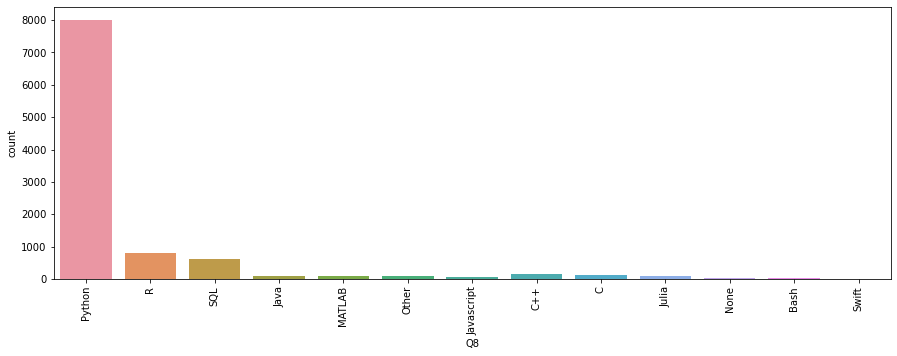

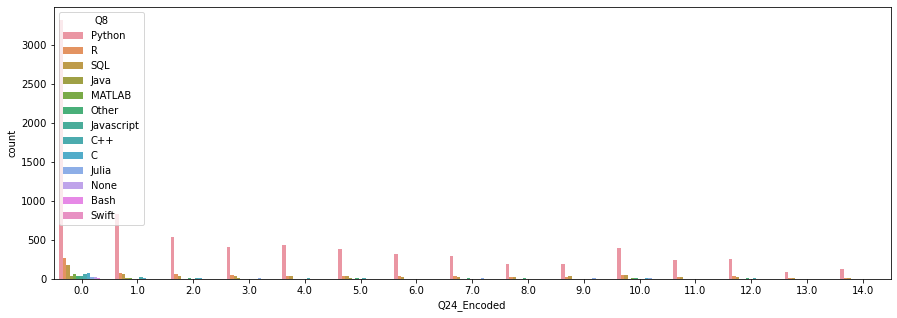

In [57]:
# encode the Q8 feature values by dummy encoding method
dummies_Q8 = pd.get_dummies(df['Q8'][1:], prefix='Q8')

# Plot the count number of each dummy features
fig, ax1 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q8', data = df[1:], ax = ax1)
plt.xticks(rotation= 90)

# Plot the count number of each salary label with different programming languages 
fig, ax2 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q24_Encoded', hue = 'Q8', data=df[1:], ax=ax2);

In [58]:
# Filling null sapce with python
df.at[df['Q8'].isnull(), 'Q8'] = "Python"

df[df['Q8'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [59]:
dummies_Q8.shape

(10729, 13)

#### Filling and encoding feature Q11

In [60]:
# report the computing platform distribution
platform = df ['Q11']
platform_popu = platform.value_counts()
print(platform_popu)

A personal computer or laptop                                                                              7597
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)                                        1662
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                                                   627
Other                                                                                                       152
None                                                                                                        130
What type of computing platform do you use most often for your data science projects? - Selected Choice       1
Name: Q11, dtype: int64


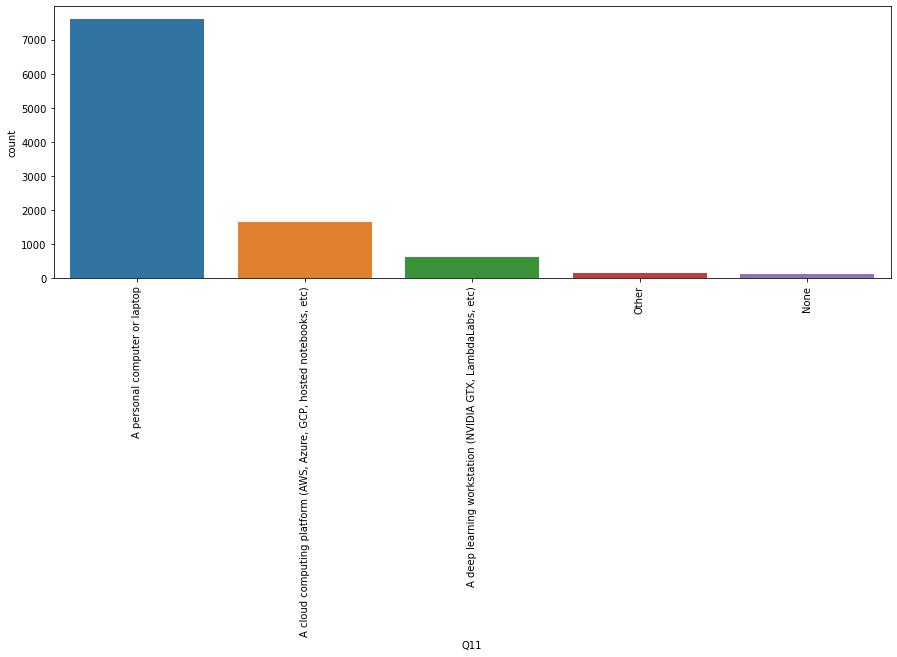

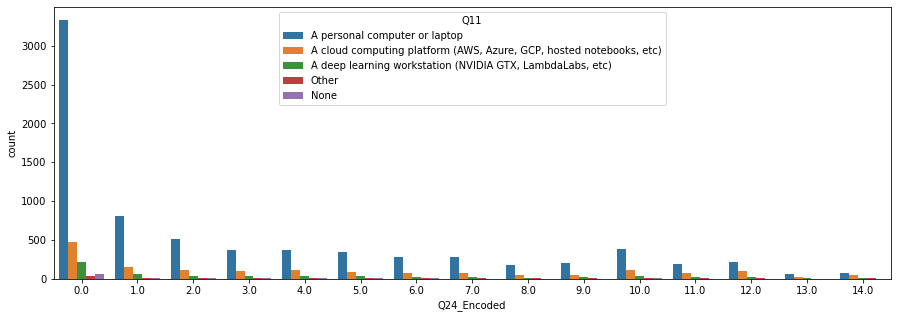

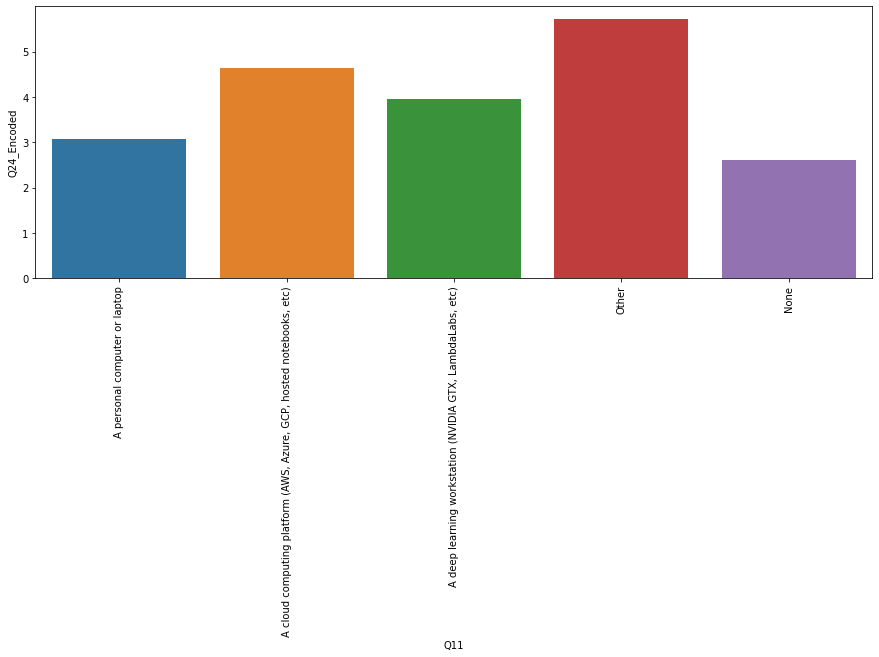

In [61]:
# encode the Q11 feature values by dummy encoding method
dummies_Q11 = pd.get_dummies(df['Q11'][1:], prefix='Q11')

# Plot the count number of each dummy features
fig, ax1 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q11', data = df[1:], ax = ax1)
plt.xticks(rotation= 90)

# Plot the count number of each salary label with different computing platform
fig, ax2 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q24_Encoded', hue = 'Q11', data=df[1:], ax=ax2)

# plot the mean salary label level in different computing platform
platform_pct = df[['Q11','Q24_Encoded']].groupby(['Q11'],as_index=False).mean()
fig, ax3 = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation= 90)
sns.barplot(x='Q11',y='Q24_Encoded', data=platform_pct, order=['A personal computer or laptop',
                                                               'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
                                                               'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)',
                                                               'Other',
                                                               'None'], ax=ax3);

In [62]:
print(df.groupby('Q11')['Q24_Encoded'].mean())

Q11
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)                                        4.643803
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                                                  3.950558
A personal computer or laptop                                                                              3.078715
None                                                                                                       2.615385
Other                                                                                                      5.710526
What type of computing platform do you use most often for your data science projects? - Selected Choice         NaN
Name: Q24_Encoded, dtype: float64


In [63]:
# build a function to fill null sapce in Q11 feature
def NaNQ11(platform, salary):
    if platform == platform:
        return platform
    if salary == 6:
        return 'Other'
    elif salary == 5:
        return 'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)'
    elif salary == 4:
        return 'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)'
    elif salary == 3:
        return 'A personal computer or laptop'
    elif salary == 2:
        return 'None'
    else:
        return 'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)'

In [64]:
# filling null space in Q11 feature
df['Q11'] = df.apply(lambda row: NaNQ11(row['Q11'],row['Q24_Encoded']),axis=1)

In [65]:
df[df['Q11'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [66]:
print(platform_popu)

A personal computer or laptop                                                                              7597
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)                                        1662
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                                                   627
Other                                                                                                       152
None                                                                                                        130
What type of computing platform do you use most often for your data science projects? - Selected Choice       1
Name: Q11, dtype: int64


In [67]:
dummies_Q11.shape

(10729, 5)

#### Filling and encoding feature Q13

In [68]:
# report the null value dataframe in feature Q13
df[df.Q13.isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [69]:
# report how many kinds of categorical labels are in this feature
print(df.Q13[1:].unique() )

['2-5 times' 'Never' '6-25 times' 'Once' nan 'More than 25 times']


In [70]:
# build Q13 buckets dictionary with all encoded label
Q13_buckets = {"Never":"0","Once":"1","2-5 times":"2-5",
              "6-25 times":"6-25","More than 25 times":"25+"}
# build Q13 encoded dictionary with all encoded label
Q13_encoded = {"Never":0,"Once":1,"2-5 times":2,"6-25 times":3,"More than 25 times":4}

df.loc[1:,'Q13_Encoded'] = df.loc[1:,'Q13'].map(Q13_encoded)
df.loc[1:,'Q13_buckets'] = df.loc[1:,'Q13'].map(Q13_buckets)
print(df.Q13_buckets.unique())
print(df.Q13_Encoded.unique())

[nan '2-5' '0' '6-25' '1' '25+']
[nan  2.  0.  3.  1.  4.]


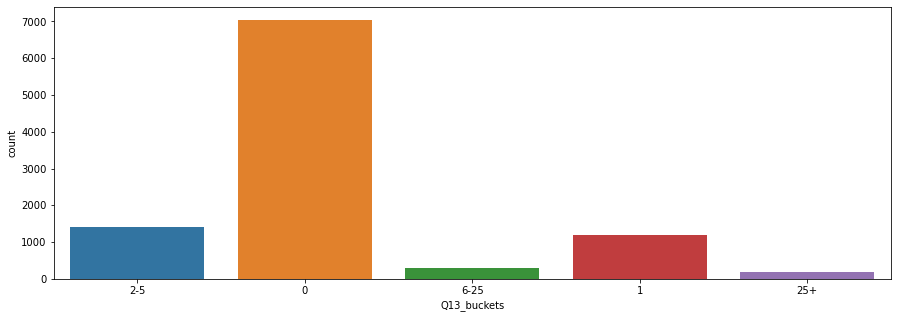

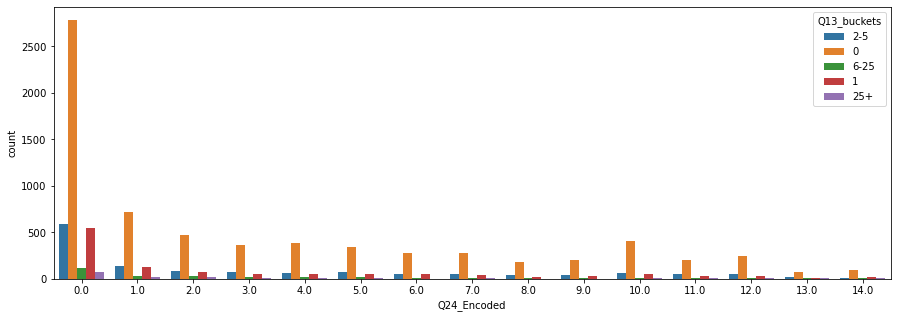

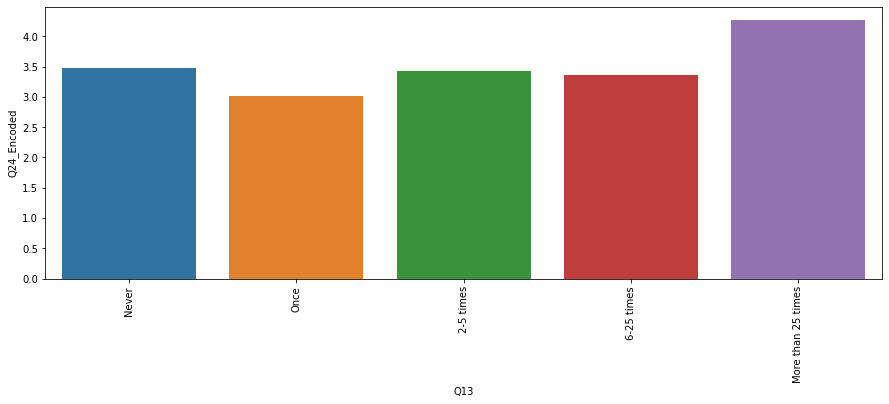

In [71]:
# Plot the count number of each dummy features
fig, ax1 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q13_buckets', data = df[1:], ax = ax1)

# Plot the count number of each salary label with different TPU time
fig, ax2 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q24_Encoded', hue = 'Q13_buckets', data=df[1:], ax=ax2)

# plot the mean salary label level in different TPU time
TPU_mean = df[['Q13','Q24_Encoded']].groupby(['Q13'],as_index=False).mean()
fig, ax3 = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation= 90)
sns.barplot(x='Q13',y='Q24_Encoded', data=TPU_mean, order=['Never','Once','2-5 times','6-25 times','More than 25 times'], ax=ax3);

In [72]:
# filling null space with Never
df.at[df.Q13.isnull(), 'Q13'] = 'Never'
df[df['Q13'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [73]:
Q13_buckets = {"Never":"0","Once":"1","2-5 times":"2-5",
              "6-25 times":"6-25","More than 25 times":"25+"}

Q13_encoded = {"Never":0,"Once":1,"2-5 times":2,"6-25 times":3,"More than 25 times":4}

df.loc[1:,'Q13_Encoded'] = df.loc[1:,'Q13'].map(Q13_encoded)
df.loc[1:,'Q13_buckets'] = df.loc[1:,'Q13'].map(Q13_buckets)
df['Q13_Encoded'].shape

(10730,)

#### Filling and encoding feature Q15

In [74]:
# report the null value dataframe in feature Q15
print(df.Q15.unique() )

['For how many years have you used machine learning methods?' '1-2 years'
 'I do not use machine learning methods' '3-4 years' '2-3 years'
 'Under 1 year' '4-5 years' '5-10 years' nan '20 or more years'
 '10-20 years']


In [75]:
# report the experience distribution
year = df['Q15'].value_counts()
print(year)

Under 1 year                                                  3038
1-2 years                                                     2223
2-3 years                                                     1248
I do not use machine learning methods                         1055
3-4 years                                                      772
5-10 years                                                     746
4-5 years                                                      693
10-20 years                                                    229
20 or more years                                               164
For how many years have you used machine learning methods?       1
Name: Q15, dtype: int64


In [76]:
# build Q15 buckets dictionary with all encoded label
Q15_buckets = {"I do not use machine learning methods":"0-2","Under 1 year":"0-2",
               "1-2 years":"0-2","2-3 years":"2-3","3-4 years":"3-4","4-5 years":"4-5",
               "5-10 years":"5-10","10-20 years":"10-20","20 or more years":"20+"}
# build Q15 encoded dictionary with all encoded label
Q15_encoded = {"I do not use machine learning methods":0,"Under 1 year":0,
               "1-2 years":0,"2-3 years":1,"3-4 years":2,"4-5 years":3,
               "5-10 years":4,"10-20 years":5,"20 or more years":6}

df.loc[1:,'Q15_Encoded'] = df.loc[1:,'Q15'].map(Q15_encoded)
df.loc[1:,'Q15_buckets'] = df.loc[1:,'Q15'].map(Q15_buckets)
print(df.Q15_buckets.unique())
print(df.Q15_Encoded.unique())

[nan '0-2' '3-4' '2-3' '4-5' '5-10' '20+' '10-20']
[nan  0.  2.  1.  3.  4.  6.  5.]


Q15
1-2 years                                                     2.547908
10-20 years                                                   7.340611
2-3 years                                                     3.659455
20 or more years                                              7.792683
3-4 years                                                     4.343264
4-5 years                                                     5.402597
5-10 years                                                    6.672922
For how many years have you used machine learning methods?         NaN
I do not use machine learning methods                         2.876777
Under 1 year                                                  2.136932
Name: Q24_Encoded, dtype: float64


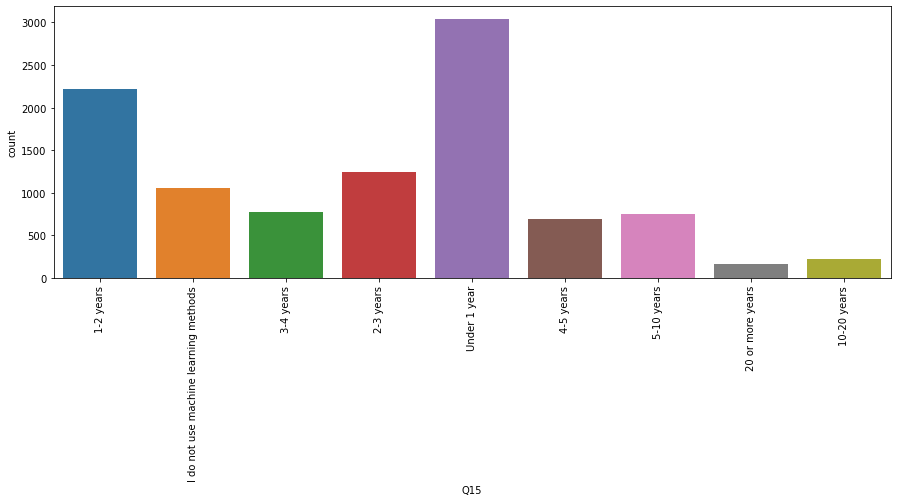

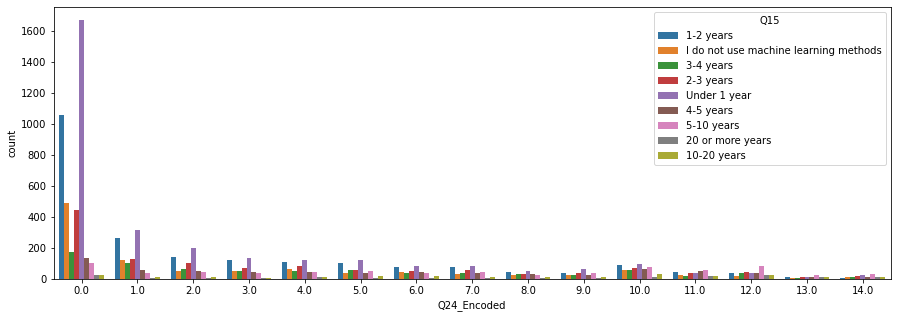

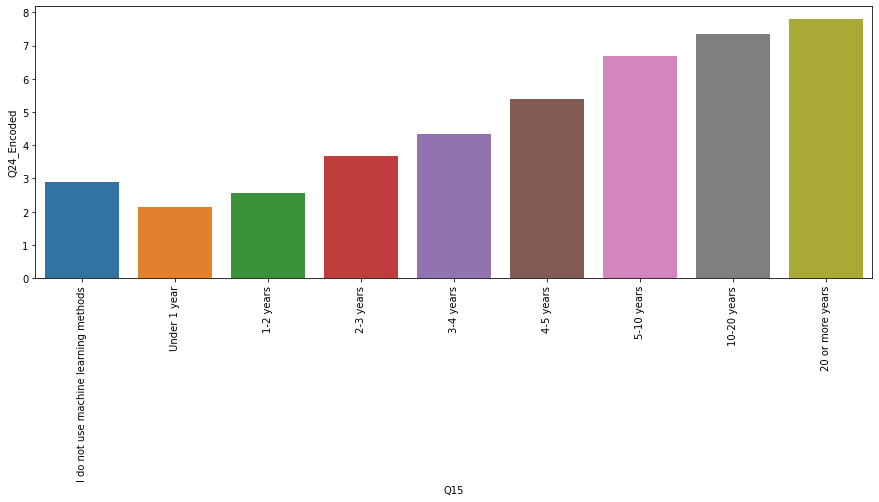

In [77]:
# Plot the count number of each dummy features
fig, ax1 = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation= 90)
sns.countplot(x='Q15', data = df[1:], ax = ax1)

# Plot the count number of each salary label with different experience
fig, ax2 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q24_Encoded', hue = 'Q15', data=df[1:], ax=ax2)

# plot the mean salary label level in different experience
experience_mean = df[['Q15','Q24_Encoded']].groupby(['Q15'],as_index=False).mean()
fig, ax3 = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation= 90)
sns.barplot(x='Q15',y='Q24_Encoded', data=experience_mean, order=['I do not use machine learning methods',
                                                               'Under 1 year','1-2 years','2-3 years','3-4 years',
                                                              '4-5 years','5-10 years','10-20 years','20 or more years'], ax=ax3);
print(df.groupby('Q15')['Q24_Encoded'].mean())

In [78]:
# build a function to fill null sapce in Q15 feature
def NaNQ15(years, salary1):
    if years == years:
        return years
    if salary1 == 1:
        return '1-2 years'
    elif salary1 == 2:
        return 'I do not use machine learning methods'
    elif salary1 == 3:
        return '2-3 years'
    elif salary1 == 4:
        return '3-4 years'
    elif salary1 == 5:
        return '4-5 years'
    elif salary1 == 6:
        return '5-10 years'
    elif salary1 == 7:
        return '10-20 years'
    elif salary1 == 8:
        return '20 or more years'
    else:
        return 'Under 1 year'

In [79]:
df['Q15'] = df.apply(lambda row: NaNQ15(row['Q15'],row['Q24_Encoded']),axis=1)

df.loc[1:,'Q15_Encoded'] = df.loc[1:,'Q15'].map(Q15_encoded)
df.loc[1:,'Q15_buckets'] = df.loc[1:,'Q15'].map(Q15_buckets)

In [80]:
df[df['Q15'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [81]:
df['Q15_Encoded'].shape

(10730,)

#### Filling and encoding feature Q25

In [82]:
# report the null value dataframe in feature Q25
print(df.Q25.unique() )

['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'
 '$100,000 or more ($USD)' '$0 ($USD)' '$10,000-$99,999' '$1-$99'
 '$1000-$9,999' '$100-$999' nan]


In [83]:
# report the money distribution
spent_count = df['Q25'].value_counts()
print(spent_count)

$0 ($USD)                                                                                                                                                                      3856
$1000-$9,999                                                                                                                                                                   1829
$100-$999                                                                                                                                                                      1764
$1-$99                                                                                                                                                                         1317
$10,000-$99,999                                                                                                                                                                1075
$100,000 or more ($USD)                                                                             

In [84]:
# build Q25 buckets dictionary with all encoded label
Q25_buckets = {"$0 ($USD)":"$0","$1-$99":"$1-$99","$100-$999":"$100-$999",
               "$1000-$9,999":"$1000-$9,999","$10,000-$99,999":"$10,000-$99,999","$100,000 or more ($USD)":"$100,000+"}
# build Q25 encoded dictionary with all encoded label
Q25_encoded = {"$0 ($USD)":0,"$1-$99":1,"$100-$999":2,"$1000-$9,999":3,"$10,000-$99,999":4,"$100,000 or more ($USD)":5}

df.loc[1:,'Q25_Encoded'] = df.loc[1:,'Q25'].map(Q25_encoded)
df.loc[1:,'Q25_buckets'] = df.loc[1:,'Q25'].map(Q25_buckets)
print(df.Q25_buckets.unique())
print(df.Q25_Encoded.unique())

[nan '$100,000+' '$0' '$10,000-$99,999' '$1-$99' '$1000-$9,999'
 '$100-$999']
[nan  5.  0.  4.  1.  3.  2.]


Q25_buckets
$0                 2.330135
$1-$99             1.873197
$10,000-$99,999    5.865116
$100,000+          7.733882
$100-$999          2.832766
$1000-$9,999       3.902132
Name: Q24_Encoded, dtype: float64


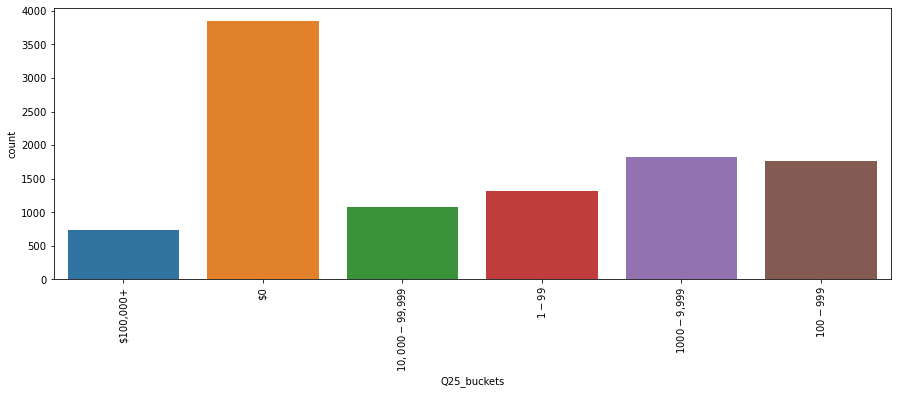

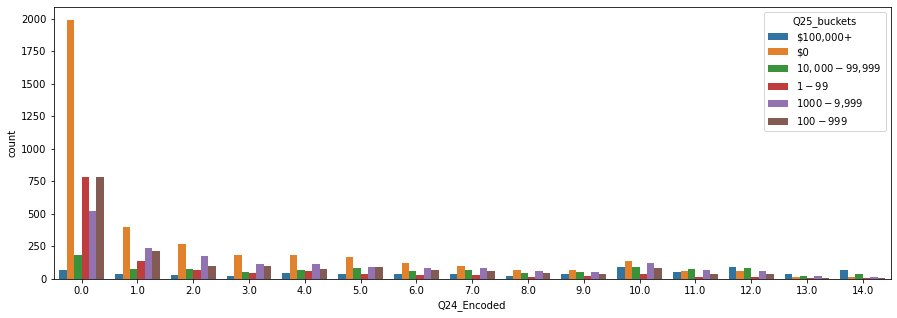

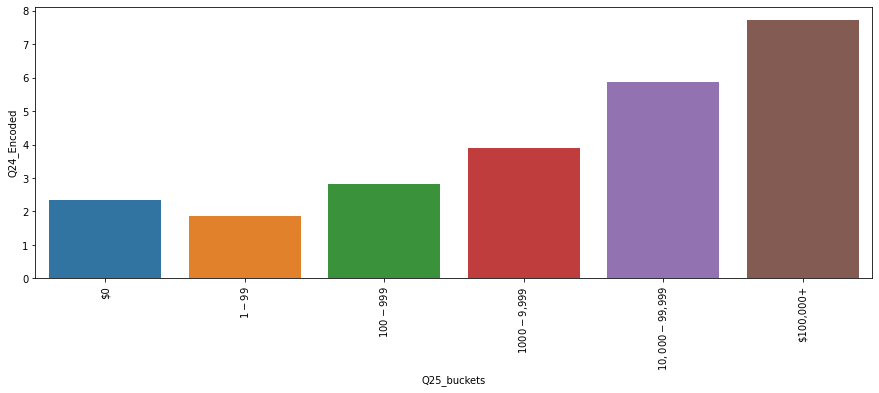

In [85]:
# Plot the count number of each dummy features
fig, ax1 = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation= 90)
sns.countplot(x='Q25_buckets', data = df[1:], ax = ax1)

# Plot the count number of each salary label with different money level
fig, ax2 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q24_Encoded', hue = 'Q25_buckets', data=df[1:], ax=ax2)

# plot the mean salary label level in different money level
spent_mean = df[['Q25_buckets','Q24_Encoded']].groupby(['Q25_buckets'],as_index=False).mean()
fig, ax3 = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation= 90)
sns.barplot(x='Q25_buckets',y='Q24_Encoded', data=spent_mean, order=['$0','$1-$99','$100-$999','$1000-$9,999',
                                                                     '$10,000-$99,999','$100,000+'], ax=ax3);
print(df.groupby('Q25_buckets')['Q24_Encoded'].mean())

In [86]:
# build a function to fill null sapce in Q25 feature
def NaNQ25(spent, salary):
    if spent == spent:
        return spent
    if salary == 2:
        return '$1-$99'
    elif salary == 3:
        return '$100-$999'
    elif salary == 4:
        return '$1000-$9,999'
    elif salary == 6:
        return '$10,000-$99,999'
    elif salary == 8:
        return '$100,000 or more ($USD)'
    else:
        return '$0 ($USD)'

In [87]:
# filling the space in feature Q25 with function NaNQ25
df['Q25'] = df.apply(lambda row: NaNQ25(row['Q25'],row['Q24_Encoded']),axis=1)
df.loc[1:,'Q25_Encoded'] = df.loc[1:,'Q25'].map(Q25_encoded)
df.loc[1:,'Q25_buckets'] = df.loc[1:,'Q25'].map(Q25_buckets)
df[df['Q25'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [88]:
df['Q24_Encoded'].shape

(10730,)

#### Filling and encoding feature Q38

In [89]:
# report the primary tool distribution
tool = df ['Q38']
tool_count = tool.value_counts()
print(tool_count)

Local development environments (RStudio, JupyterLab, etc.)                                                            4289
Basic statistical software (Microsoft Excel, Google Sheets, etc.)                                                     2815
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)                                                   676
Advanced statistical software (SPSS, SAS, etc.)                                                                        621
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                                                               580
Other                                                                                                                  495
What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice       1
Name: Q38, dtype: int64


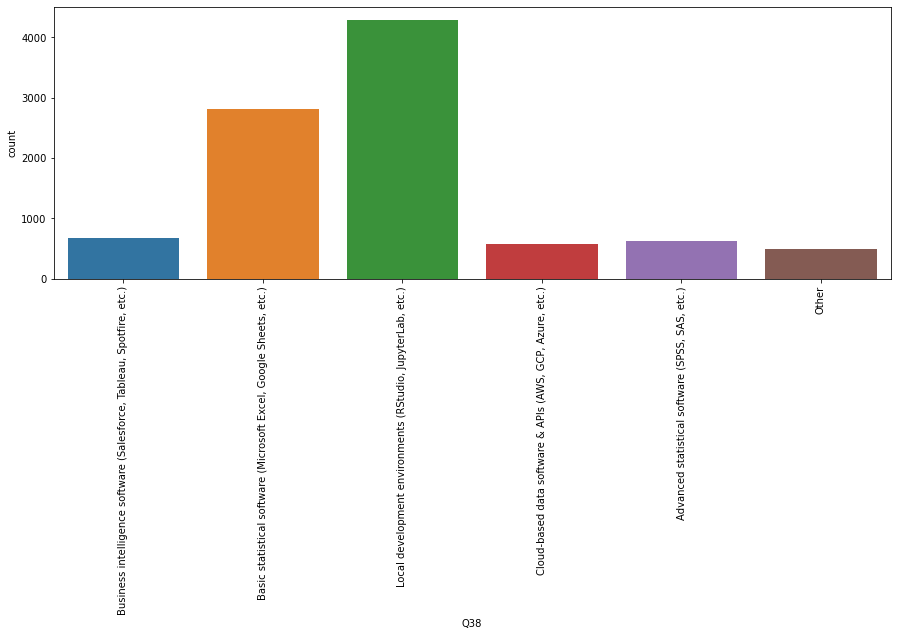

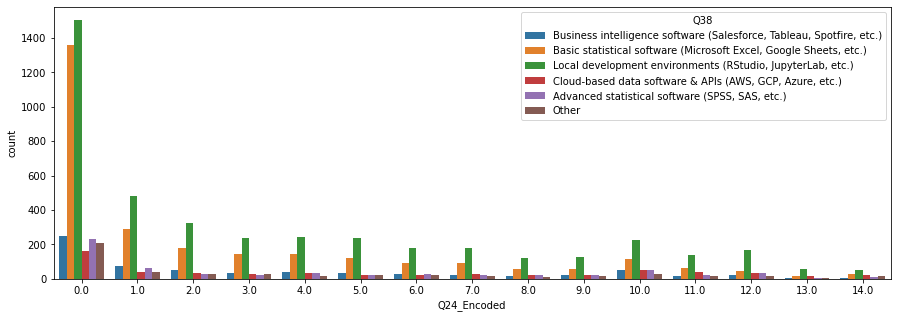

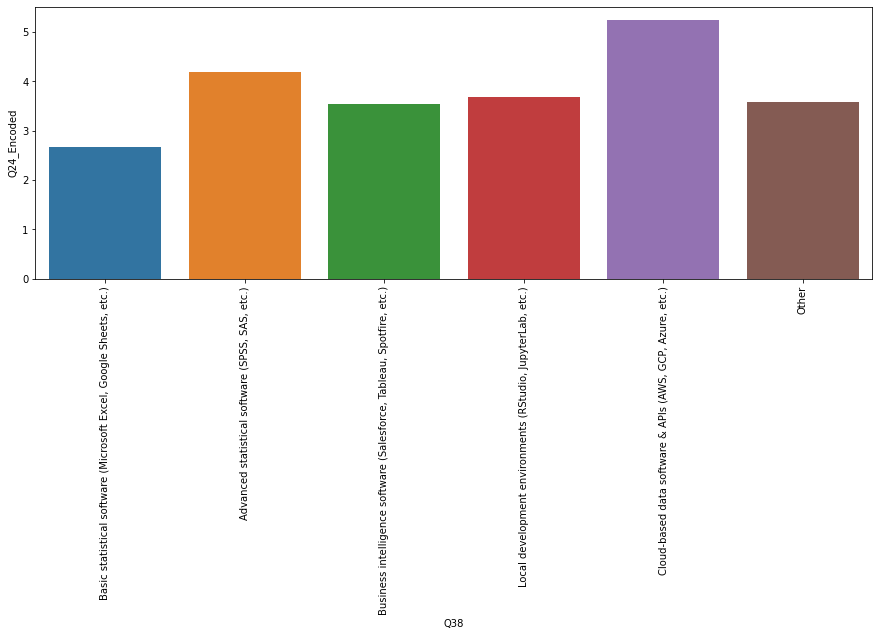

In [90]:
# encode the Q38 feature values by dummy encoding method
dummies_Q38 = pd.get_dummies(df['Q38'][1:], prefix='Q38')

# Plot the count number of each dummy features
fig, ax1 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q38', data = df[1:], ax = ax1)
plt.xticks(rotation= 90)

# Plot the count number of each salary label with different primary tool
fig, ax2 = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Q24_Encoded', hue = 'Q38', data=df[1:], ax=ax2)

# plot the mean salary label level in different primary tool
tool_mean = df[['Q38','Q24_Encoded']].groupby(['Q38'],as_index=False).mean()
fig, ax3 = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation= 90)
sns.barplot(x='Q38',y='Q24_Encoded', data=tool_mean, order=['Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
                                                            'Advanced statistical software (SPSS, SAS, etc.)',
                                                            'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
                                                            'Local development environments (RStudio, JupyterLab, etc.)',
                                                            'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
                                                            'Other'], ax=ax3);

In [91]:
# filling the null space in feature with "Local development environments (RStudio, JupyterLab, etc.)"
df.at[df['Q38'].isnull(), 'Q38'] = "Local development environments (RStudio, JupyterLab, etc.)"
df[df['Q38'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

### Combination of all encoded features

In [92]:
df_encoded = pd.concat([df['Q1_Encoded'],df["Q6_Encoded"],df['Q20_Encoded'],
                        df['Q21_Encoded'],df['Q13_Encoded'],df['Q15_Encoded'],df['Q25_Encoded'],
                       dummies_Q2,dummies_Q3,dummies_Q4,dummies_Q5,dummies_Q22,dummies_Q11,dummies_Q8,
                       dummies_Q38,df['Q24_Encoded'],],axis = 1)
df_encoded = df_encoded[1:]
df_encoded

,Q1_Encoded,Q6_Encoded,Q20_Encoded,Q21_Encoded,Q13_Encoded,Q15_Encoded,Q25_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Prefer to self-describe,Q2_Woman,Q3_Brazil,Q3_Canada,Q3_China,Q3_France,Q3_Germany,Q3_India,Q3_Italy,Q3_Japan,Q3_Nigeria,Q3_Other,Q3_Russia,Q3_Spain,Q3_Turkey,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q4_Bachelor’s degree,Q4_Doctoral degree,Q4_I prefer not to answer,Q4_Master’s degree,Q4_No formal education past high school,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Machine Learning Engineer,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),"Q11_A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)","Q11_A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",Q11_A personal computer or laptop,Q11_None,Q11_Other,Q8_Bash,Q8_C,Q8_C++,Q8_Java,Q8_Javascript,Q8_Julia,Q8_MATLAB,Q8_None,Q8_Other,Q8_Python,Q8_R,Q8_SQL,Q8_Swift,"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other,Q24_Encoded
1,3.0,4.0,4.0,6.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0
2,4.0,5.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.0,4.0,2.0,3.0,2.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0
4,4.0,4.0,3.0,6.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
5,4.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,4.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

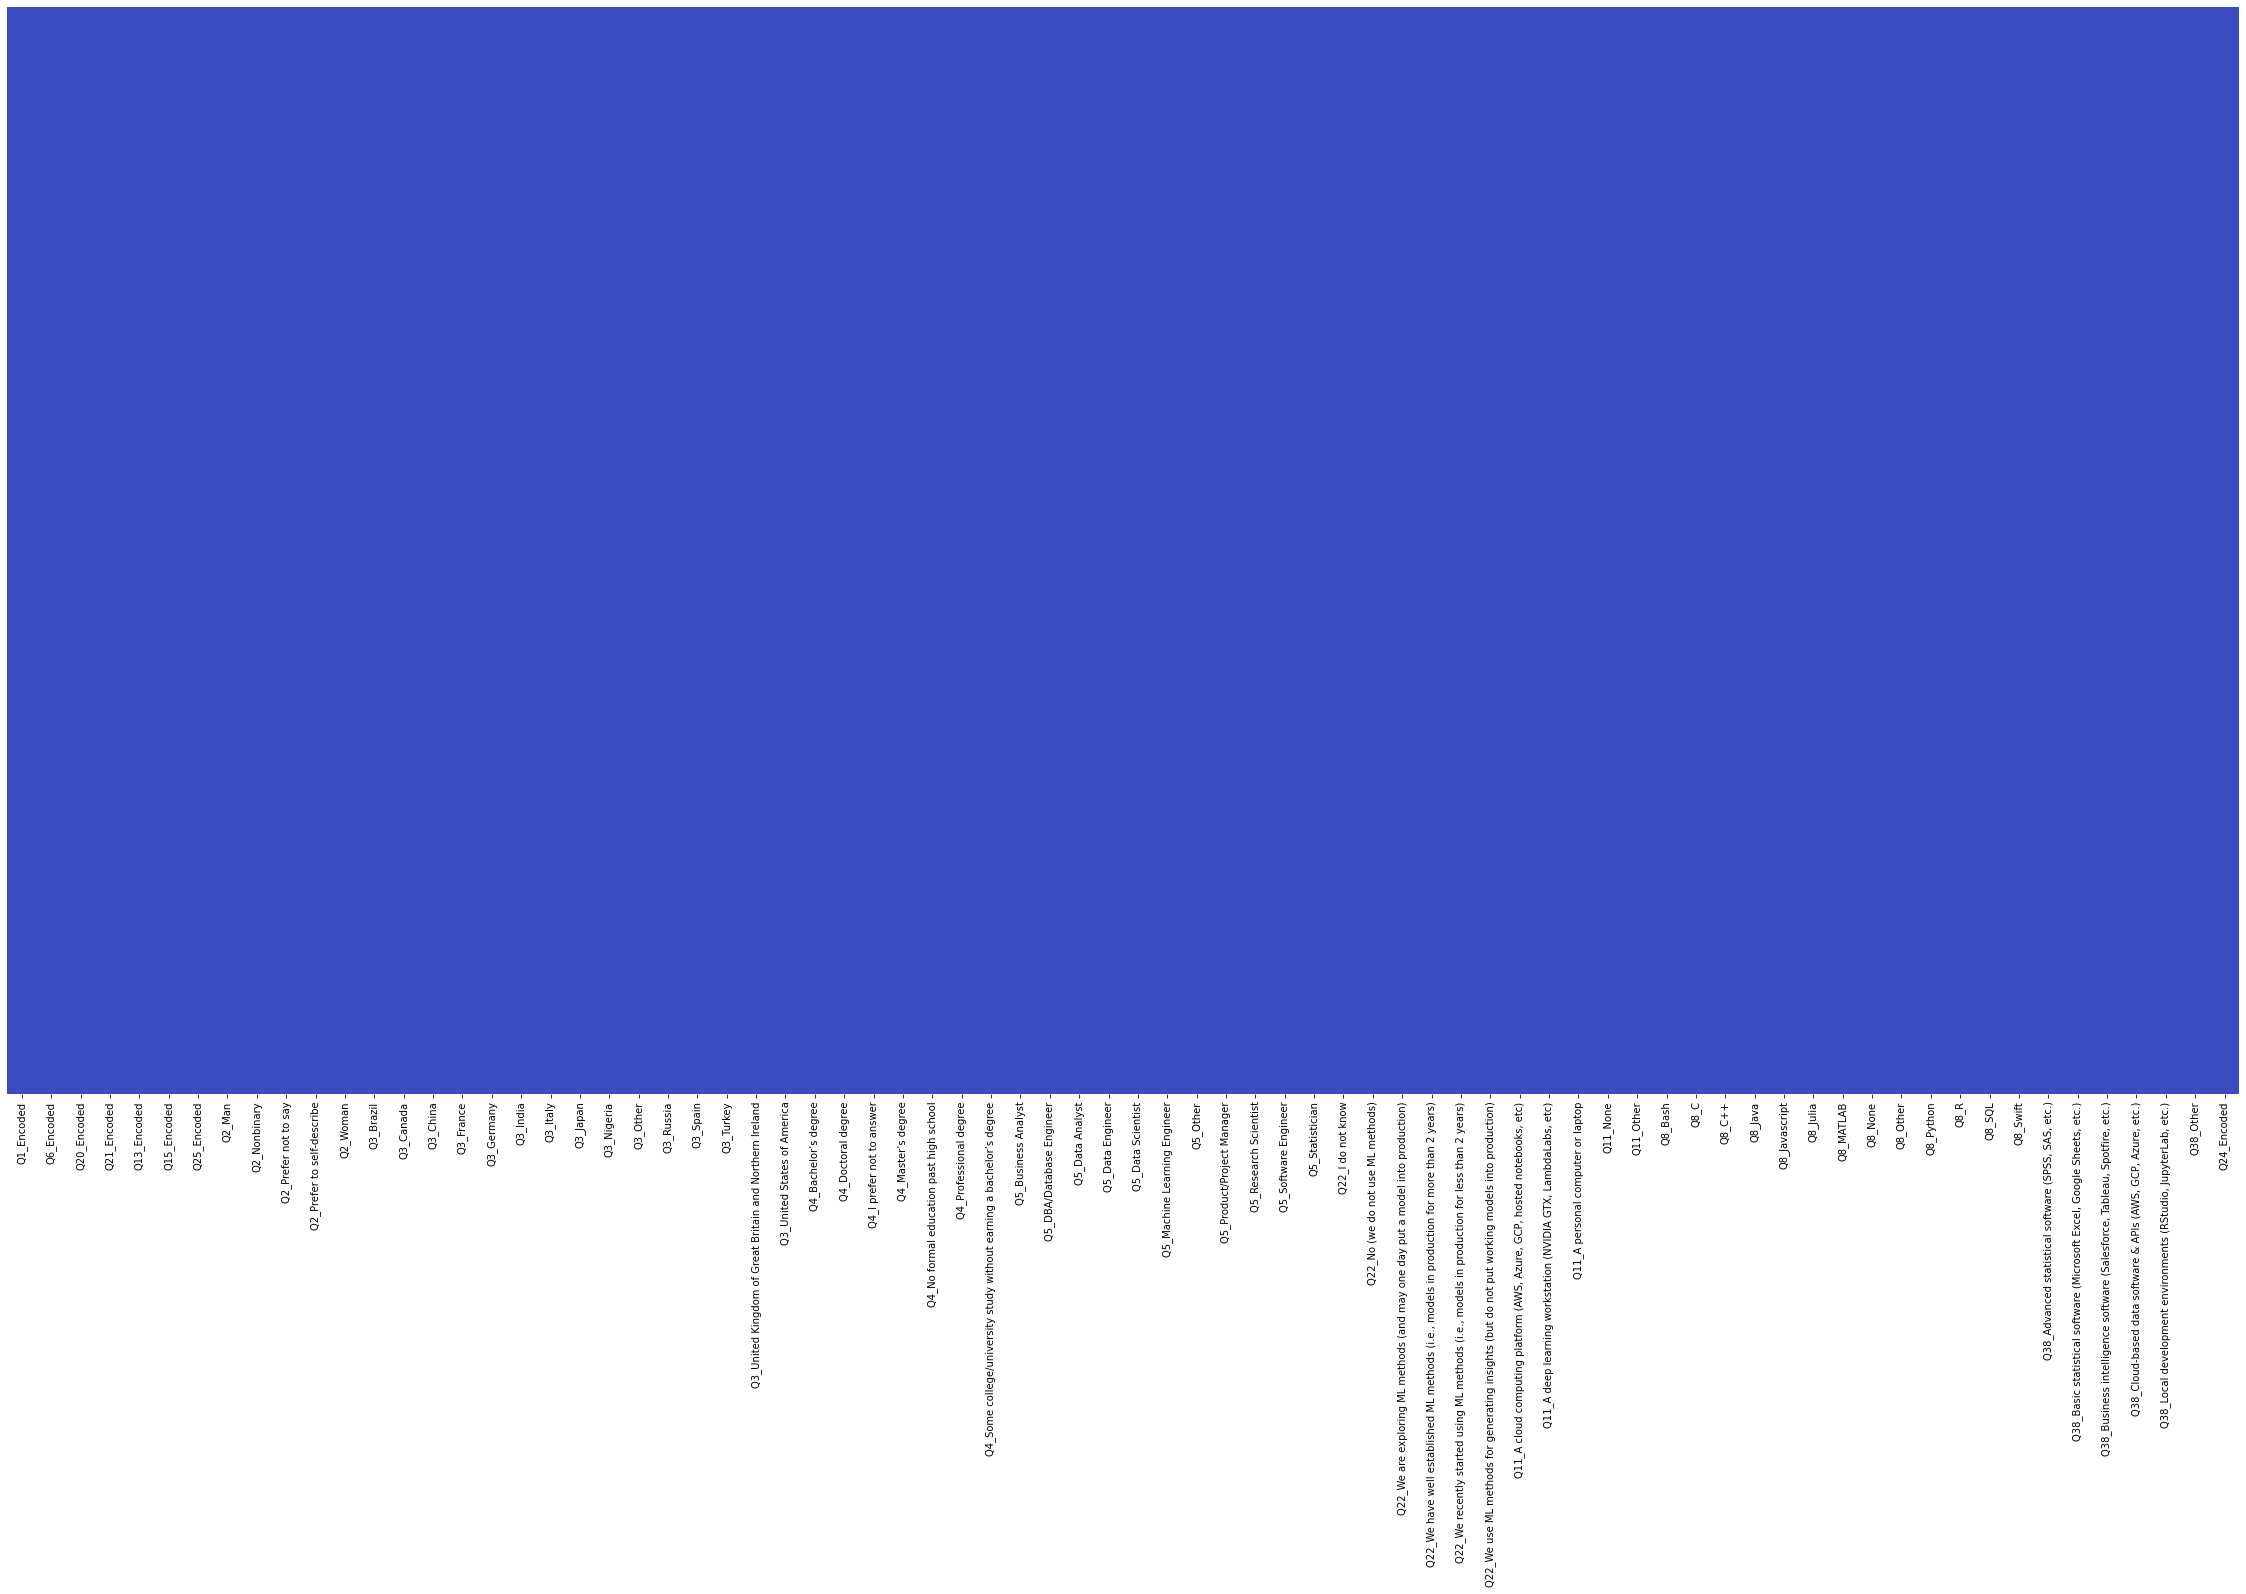

In [93]:
# look at the number of missing data using a heatmap
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(df_encoded.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

## Q2 Exploratory data analysis and feature selection

In [94]:
df_encoded.describe()

,Q1_Encoded,Q6_Encoded,Q20_Encoded,Q21_Encoded,Q13_Encoded,Q15_Encoded,Q25_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Prefer to self-describe,Q2_Woman,Q3_Brazil,Q3_Canada,Q3_China,Q3_France,Q3_Germany,Q3_India,Q3_Italy,Q3_Japan,Q3_Nigeria,Q3_Other,Q3_Russia,Q3_Spain,Q3_Turkey,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q4_Bachelor’s degree,Q4_Doctoral degree,Q4_I prefer not to answer,Q4_Master’s degree,Q4_No formal education past high school,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Machine Learning Engineer,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),"Q11_A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)","Q11_A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",Q11_A personal computer or laptop,Q11_None,Q11_Other,Q8_Bash,Q8_C,Q8_C++,Q8_Java,Q8_Javascript,Q8_Julia,Q8_MATLAB,Q8_None,Q8_Other,Q8_Python,Q8_R,Q8_SQL,Q8_Swift,"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other,Q24_Encoded
count,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.00000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.00000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000,10729.000000
mean,3.469662,3.201510,1.694939,2.495293,0.536956,0.959269,1.709386,0.826918,0.001864,0.012210,0.002144,0.156865,0.041290,0.018455,0.015472,0.018361,0.023861,0.219312,0.017150,0.035884,0.022929,0.346351,0.032715,0.02181,0.015472,0.032622,0.138317,0.280828,0.160127,0.014726,0.454749,0.009880,0.043807,0.035884,0.063193,0.010439,0.117439,0.034393,0.223506,0.085562,0.140554,0.054991,0.095815,0.150993,0.023115,0.136919,0.199087,0.212974,0.17448,0.163016,0.113524,0.154907,0.058440,0.708081,0.012117,0.014167,0.001491,0.012117,0.013049,0.007456,0.005126,0.007270,0.009787,0.003076,0.009321,0.745829,0.074844,0.057601,0.000746,0.057881,0.262373,0.063007,0.054059,0.399758,0.046137,3.339174
std,2.212355,1.667012,1.569141,2.145265,0.952918,1.544372,1.647085,0.378336,0.043137,0.109827,0.046253,0.363690,0.198969,0.134595,0.123427,0.134261,0.152622,0.413800,0.129835,0.186010,0.149683,0.475829,0.177898,0.14607,0.123427,0.177653,0.345248,0.449424,0.366741,0.120461,0.497971,0.098909,0.204674,0.186010,0.243321,0.101641,0.321957,0.182244,0.416614,0.279730,0.347577,0.227974,0.294351,0.358058,0.150276,0.343777,0.399332,0.409429,0.37954,0.369398,

Q3_United States of America                                                                      0.519362
Q15_Encoded                                                                                      0.384297
Q6_Encoded                                                                                       0.375758
Q1_Encoded                                                                                       0.367102
Q25_Encoded                                                                                      0.364070
Q3_India                                                                                         0.271049
Q21_Encoded                                                                                      0.263443
Q22_We have well established ML methods (i.e., models in production for more than 2 years)       0.245233
Q20_Encoded                                                                                      0.234390
Q3_Other                                      

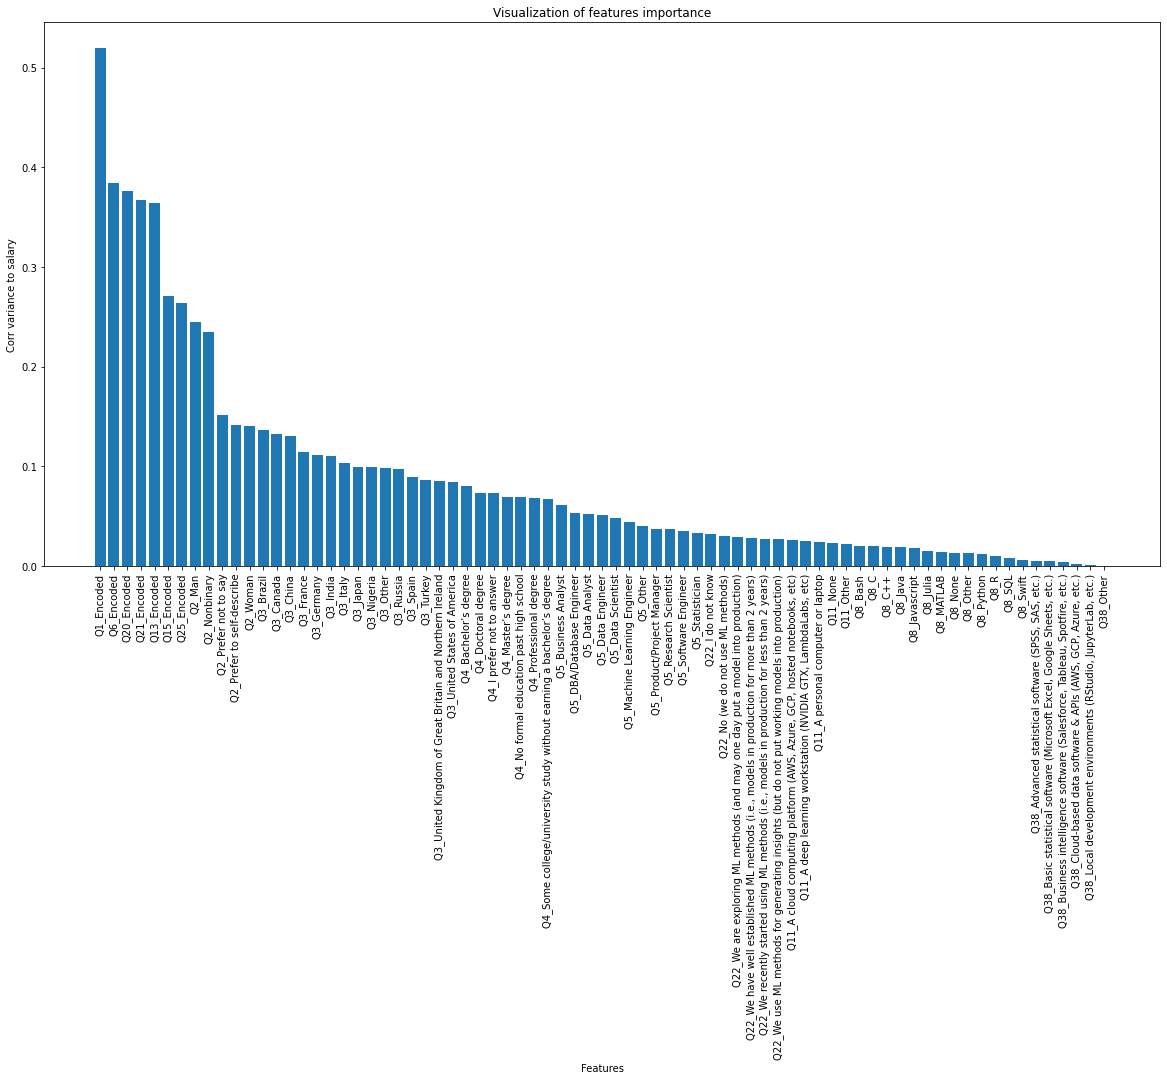

In [95]:
# and plot feature importance image (with .corr() function)
col = df_encoded.drop(['Q24_Encoded'],axis=1).columns
index = np.array(col)

corr_values = abs(df_encoded.corr()["Q24_Encoded"]).drop(index = "Q24_Encoded").sort_values(ascending = False)
print(corr_values)
f, ax = plt.subplots(figsize=(20,10))
plt.bar(index,corr_values)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Corr variance to salary")
ax.set_title('Visualization of features importance')
plt.show()

#### Analyzation:

The the sorted order list of feature importance has been reported, and which shows the Q1_encoded has the highest feature importance through all features in this model.

The visualization plot of features importance has been reported.

#### Feature Engineering:

For the engineering analyzation. As the programming showed before. During this assignment I selected two main methods to encode categorical data: label encoding and dummy encoding. For the null space filling methods. I also selected two methods build a stepped label function based on the results of the plot which shows mian salary label level in different categorical label. The other way to fiil null space feature is select all null space with the categorical data with maximum possibilities.

### Feature selection 

#### method 1: Feature Importance (Random Forest Regressor)

In [96]:
# split the dataframe to target data and prediction data
X = df_encoded.drop(['Q24_Encoded'],axis=1)
y = df_encoded['Q24_Encoded']

# split the dataframe to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Rescaling values with scaler function
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import warnings
warnings.filterwarnings("ignore")

In [97]:
#Create and fit a RFR model
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

df_feature_importance = pd.DataFrame(reg.feature_importances_, index=index, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
Q3_United States of America,0.275727
Q25_Encoded,0.092381
Q1_Encoded,0.092285
Q15_Encoded,0.071275
Q6_Encoded,0.049221
Q20_Encoded,0.041124
Q21_Encoded,0.038966
Q13_Encoded,0.020066
Q3_United Kingdom of Great Britain and Northern Ireland,0.013042
Q3_Canada,0.012123


In [98]:
# showed all features importance values 
df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in reg.estimators_], columns=index)
df_feature_all.head()

,Q1_Encoded,Q6_Encoded,Q20_Encoded,Q21_Encoded,Q13_Encoded,Q15_Encoded,Q25_Encoded,Q2_Man,Q2_Nonbinary,Q2_Prefer not to say,Q2_Prefer to self-describe,Q2_Woman,Q3_Brazil,Q3_Canada,Q3_China,Q3_France,Q3_Germany,Q3_India,Q3_Italy,Q3_Japan,Q3_Nigeria,Q3_Other,Q3_Russia,Q3_Spain,Q3_Turkey,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q4_Bachelor’s degree,Q4_Doctoral degree,Q4_I prefer not to answer,Q4_Master’s degree,Q4_No formal education past high school,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Machine Learning Engineer,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q22_I do not know,Q22_No (we do not use ML methods),Q22_We are exploring ML methods (and may one day put a model into production),"Q22_We have well established ML methods (i.e., models in production for more than 2 years)","Q22_We recently started using ML methods (i.e., models in production for less than 2 years)",Q22_We use ML methods for generating insights (but do not put working models into production),"Q11_A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)","Q11_A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",Q11_A personal computer or laptop,Q11_None,Q11_Other,Q8_Bash,Q8_C,Q8_C++,Q8_Java,Q8_Javascript,Q8_Julia,Q8_MATLAB,Q8_None,Q8_Other,Q8_Python,Q8_R,Q8_SQL,Q8_Swift,"Q38_Advanced statistical software (SPSS, SAS, etc.)","Q38_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38_Local development environments (RStudio, JupyterLab, etc.)",Q38_Other
0,0.101293,0.049122,0.055935,0.037030,0.022324,0.051380,0.117476,0.004500,0.000174,0.002831,0.000000,0.002634,0.004933,0.013893,0.001632,0.001918,0.010347,0.006378,0.002576,0.005289,0.001343,0.004604,0.003095,0.003138,0.000567,0.008492,0.265011,0.007928,0.004808,0.001270,0.011257,0.001635,0.002384,0.001614,0.008194,0.000335,0.003764,0.001335,0.011404,0.006231,0.006520,0.006065,0.007878,0.006544,0.001980,0.005403,0.010761,0.005598,0.012561,0.005415,0.007003,0.005030,0.005574,0.007736,0.001168,0.002776,0.000000,0.002153,0.001035,0.000781,0.000000,0.000250,0.001893,0.001447,0.001338,0.007888,0.004924,0.001164,0.000198,0.001469,0.006457,0.004422,0.011816,0.011270,0.003406
1,0.098570,0.046357,0.038600,0.050352,0.019295,0.046554,0.097437,0.005306,0.001261,0.002016,0.000000,0.005046,0.004684,0.008787,0.003859,0.003672,0.013336,0.007087,0.003470,0.006125,0.000156,0.005804,0.001720,0.001417,0.001427,0.012096,0.282761,0.011162,0.004227,0.000441,0.011660,0.000936,0.007696,0.003724,0.002469,0.000906,0.008070,0.002369,0.010258,0.003481,0.008184,0.004321,0.009133,0.008984,0.001583,0.009880,0.006333,0.014884,0.006877,0.003258,0.005849,0.006559,0.003406,0.006777,0.001431,0.002584,0.000028,0.000907,0.002714,0.000504,0.000000,0.000469,0.000913,0.000298,0.003443,0.007724,0.006126,0.006164,0.000174,0.004454,0.008147,0.004438,0.006100,0.010151,0.002610
2,0.078572,0.052158,0.035637,0.026781,0.016343,0.119013,0.069066,0.005635,0.000031,0.001878,0.000403,0.003216,0.002190,0.013609,0.002848,0.001839,0.011336,0.008444,0.001047,0.004709,0.001186,0.008174,0.001756,0.002928,0.000358,0.010139,0.277264,0.011377,0.006207,0.002901,0.011201,0.000476,0.003556,0.003884,0.003766,0.000900,0.003314,0.003429,0.014032,0.003732,0.008782,0.005210,0.009572,0.002470,0.001037,0.010050,0.006600,0.008078,0.011764,0.008020,0.006564,0.004278,0.004274,0.010576,0.000285,0.001437,0.000782,0.000111,0.001951,0.001316,0.000043,0.000901,0.000667,0.000910,0.002057,0.005814,0.005433,0.003084,0.000057,0.006551,0.010711,0.010447,0.002549,0.013254,0.009030
3,0.059638,0.112384,0.050750,0.029774,0.017838,0.029401,0.084650,0.003134,0.000000,0.002485,0.002633,0.006309,0.

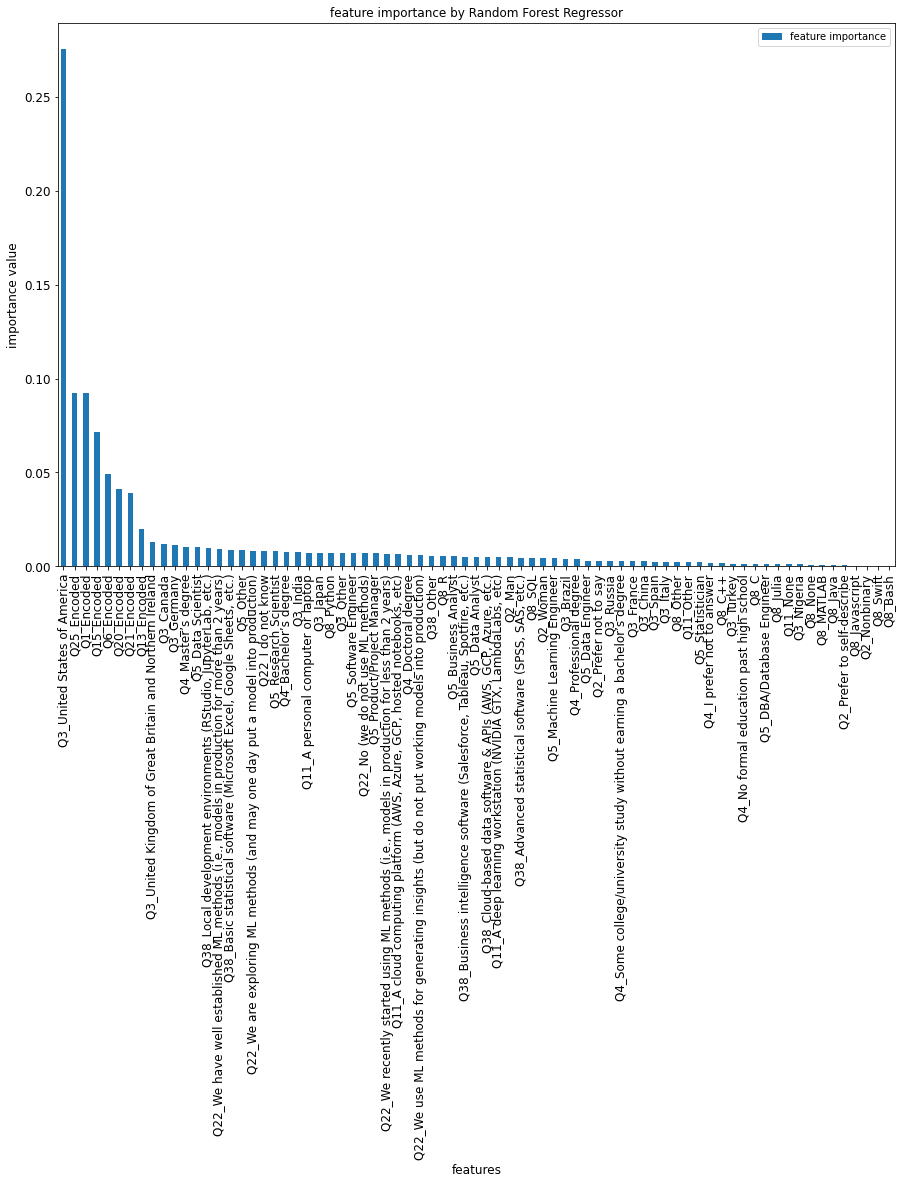

In [99]:
# Plot the feature importance by Random Forest Regressor in a bar diagrame
ax = df_feature_importance.plot(kind='bar', title ="feature importance by Random Forest Regressor", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("features", fontsize=12)
ax.set_ylabel("importance value", fontsize=12)
plt.show()

#### method 2: Recursive Feature Elimination

In [100]:
# Create and fit a RLogistic Regression model
model1 = LogisticRegression()    
model1.fit(X_train, y_train)

# Create and fit a RRecursive Feature Elimination model which based on the Logistic Regression
rfe_selector = RFE(estimator=model1, step=10, verbose=0)
rfe_selector_fit = rfe_selector.fit(X_train, y_train)

#rfe_support = rfe_selector.get_support()
#rfe_feature = X.loc[:,rfe_support].columns.tolist()
#print(rfe_feature)

print("Num Features: %d" % rfe_selector_fit.n_features_)
print("Selected Features: %s" % rfe_selector_fit.support_)
print("Feature Ranking: %s" % rfe_selector_fit.ranking_)
print(sorted(list(zip(rfe_selector_fit.ranking_,index))))

Num Features: 37
Selected Features: [ True  True  True False False  True  True False False  True  True False
  True  True  True False  True  True  True  True  True False  True  True
  True  True  True False False  True False False False False False  True
  True False False False False False  True False False  True  True False
 False False False False False  True False False False  True  True  True
  True  True  True  True False  True  True  True False False False False
 False False False]
Feature Ranking: [1 1 1 3 4 1 1 2 3 1 1 5 1 1 1 3 1 1 1 1 1 4 1 1 1 1 1 5 5 1 5 2 3 5 3 1 1
 4 5 4 2 3 1 3 4 1 1 5 3 4 3 2 4 1 2 5 2 1 1 1 1 1 1 1 2 1 1 1 4 4 3 5 4 2
 5]
[(1, 'Q11_A personal computer or laptop'), (1, 'Q15_Encoded'), (1, 'Q1_Encoded'), (1, 'Q20_Encoded'), (1, 'Q22_I do not know'), (1, 'Q22_No (we do not use ML methods)'), (1, 'Q25_Encoded'), (1, 'Q2_Prefer not to say'), (1, 'Q2_Prefer to self-describe'), (1, 'Q3_Brazil'), (1, 'Q3_Canada'), (1, 'Q3_China'), (1, 'Q3_Germany'), (1, 'Q3_I

#### Justification of Feature Selection Technique:

Based on the results of these two methods：Recursive Feature Elimination and  Feature Importance (Random Forest Regressor)
selected features:

Q1_Encoded, Q15_Encoded, Q20_Encoded, Q25_Encoded, Q6_Encoded, Q21_Encoded, Q13_Encoded, Q3_United States of America, Q3_United Kingdom of Great Britain and Northern Ireland, Q3_Canada, Q3_Germany, Q5_Data Analyst, and Q4_Master’s degree. 

## Q3 Model implementation

In [101]:
# Combination of all selected encoded features
selected_feature = pd.concat([df_encoded[ 'Q1_Encoded'],df_encoded['Q15_Encoded'],df_encoded['Q20_Encoded'],
                              df_encoded['Q25_Encoded'],df_encoded['Q6_Encoded'],df_encoded['Q21_Encoded'],
                              df_encoded['Q13_Encoded'],df_encoded['Q3_United States of America'],
                              df_encoded['Q3_United Kingdom of Great Britain and Northern Ireland'],
                              df_encoded['Q3_Canada'],df_encoded['Q3_Germany'],df_encoded[ 'Q5_Data Analyst'],
                              df_encoded['Q4_Master’s degree'],df_encoded['Q24_Encoded']],axis = 1)

selected_feature.to_csv("selected_feature_kaggle_data_2020.csv", index=False)

In [102]:
selected_feature

,Q1_Encoded,Q15_Encoded,Q20_Encoded,Q25_Encoded,Q6_Encoded,Q21_Encoded,Q13_Encoded,Q3_United States of America,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_Canada,Q3_Germany,Q5_Data Analyst,Q4_Master’s degree,Q24_Encoded
1,3.0,0.0,4.0,5.0,4.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0
2,4.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,2.0,2.0,4.0,4.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0
4,4.0,1.0,3.0,4.0,4.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
5,4.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,4.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10726,4.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10727,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10728,1.0,0.0,4.0,0.0,3.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# split train and test dataframe from the seclected_feature dataframe:
selected_feature_train, selected_feature_test = train_test_split(selected_feature, test_size=0.1, random_state=42, shuffle=True)

In [104]:
# split train and test dataframe from the selected_feature_train dataframe:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(selected_feature_train.drop(['Q24_Encoded'],axis=1), 
                                                        selected_feature_train['Q24_Encoded'], random_state=42, test_size=0.3)

# Rescaling values with scaler function
scaler = StandardScaler()

Xs_train = scaler.fit_transform(Xs_train)
Xs_test = scaler.transform(Xs_test)
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [105]:
# build an ordinal logistic regression model with cross validation which Kfold value is 10 
X = selected_feature_train.drop(['Q24_Encoded'],axis=1)
Y = selected_feature_train['Q24_Encoded']
model = LogisticRegression()  
kf = KFold(n_splits=10)
    
outcomes = []
fold = 0
    
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    #
    accuracy = accuracy_score(Y_test, predictions) 
    outcomes.append(accuracy)
    
    print("Fold {} Accuracy: {}".format(fold, accuracy))   
    
print("Mean cross validation accuracy {}".format(np.mean(outcomes))) 
print("Standard Deviation (SD): {}".format(np.std(outcomes)))
print("Varaince: {}".format((np.std(outcomes))**2))

Fold 1 Accuracy: 0.42960662525879917
Fold 2 Accuracy: 0.4244306418219462
Fold 3 Accuracy: 0.42960662525879917
Fold 4 Accuracy: 0.41821946169772256
Fold 5 Accuracy: 0.43685300207039335
Fold 6 Accuracy: 0.4192546583850932
Fold 7 Accuracy: 0.44455958549222796
Fold 8 Accuracy: 0.44248704663212435
Fold 9 Accuracy: 0.41658031088082903
Fold 10 Accuracy: 0.44974093264248705
Mean cross validation accuracy 0.4311338890140422
Standard Deviation (SD): 0.01121328507782562
Varaince: 0.00012573776223658673


In [82]:

# build a parameter list with C selection list, solver list, and penalty list.
solver_list =  ['newton-cg','lbfgs','liblinear','sag','saga']
C_list = np.logspace(-2,2,20)
penalty = ['l1','l2']
parameter = {'C': C_list, 'penalty': penalty, 'solver':solver_list}

# repit the previos steps to found hyperparameters include solver and penalty
# Run the grid search
gscv_model = GridSearchCV(LogisticRegression(), parameter, cv=10)
gscv_model.fit(Xs_train,ys_train)

# Get model predicted values of train and test data
predict_Xs_train = gscv_model.predict(Xs_train)
predict_Xs_test = gscv_model.predict(Xs_test)

# Calculate the mean accuracy value of all multi-class target based on train and test data
train_mean_accuracy = accuracy_score(ys_train, predict_Xs_train)
test_mean_accuracy = accuracy_score(ys_test, predict_Xs_test)

# print the best parameter list and accuracy value from train and test data
print("tuned hpyerparameters :",gscv_model.best_params_)
print("train accuracy :", train_mean_accuracy)
print("test accuracy :", test_mean_accuracy)

tuned hpyerparameters : {'C': 0.04281332398719394, 'penalty': 'l2', 'solver': 'newton-cg'}
train accuracy : 0.43985796715490455
test accuracy : 0.43562305833620985


## Q4  Model tuning

In [84]:
# Different model performanse based on the different metrics: accuracy, precision, recall and f1_score

# For using accuracy metrics
C_list = np.logspace(-2,2,20)
solver_list =  ['newton-cg','lbfgs','liblinear','sag','saga']
penalty = ['l1','l2']

parameter = {'C': C_list, 'penalty': penalty, 'solver':solver_list}

# Run the grid search by accuracy metrics
gscv_model_accuracy  = GridSearchCV(LogisticRegression(), parameter, cv=10, scoring = 'accuracy')
gscv_model_accuracy.fit(Xs_train,ys_train)

# Get model predicted values of train and test data
predict_Xs_train = gscv_model_accuracy.predict(Xs_train)
predict_Xs_test = gscv_model_accuracy.predict(Xs_test)

# Calculate the mean accuracy value of all multi-class target based on train and test data
train_mean_accuracy = accuracy_score(ys_train, predict_Xs_train)
test_mean_accuracy = accuracy_score(ys_test, predict_Xs_test)

print("tuned hpyerparameters (accuracy): ",gscv_model_accuracy.best_params_)
print("train accuracy :", train_mean_accuracy)
print("test accuracy :", test_mean_accuracy)

tuned hpyerparameters (accuracy):  {'C': 0.04281332398719394, 'penalty': 'l2', 'solver': 'newton-cg'}
train accuracy : 0.43985796715490455
test accuracy : 0.43562305833620985


In [85]:
# For using precision metrics

# Run the grid search by precision metrics
gscv_model_precision  = GridSearchCV(LogisticRegression(), parameter, cv=10, scoring = 'precision_macro')
gscv_model_precision.fit(Xs_train,ys_train)

# Get model predicted values of train and test data
predict_Xs_train = gscv_model_precision.predict(Xs_train)
predict_Xs_test = gscv_model_precision.predict(Xs_test)

# Calculate the mean accuracy value of all multi-class target based on train and test data
train_mean_precision = accuracy_score(ys_train, predict_Xs_train)
test_mean_precision = accuracy_score(ys_test, predict_Xs_test)

print("tuned hpyerparameters (precision): ",gscv_model_precision.best_params_)
print("train accuracy :", train_mean_precision)
print("test accuracy :", test_mean_precision)

tuned hpyerparameters (precision):  {'C': 0.11288378916846889, 'penalty': 'l2', 'solver': 'newton-cg'}
train accuracy : 0.44104157419736645
test accuracy : 0.4380393510528133


In [86]:
# For using f1_score metrics
# Run the grid search by f1_score metrics
gscv_model_f1_score  = GridSearchCV(LogisticRegression(), parameter, cv=10, scoring = 'f1_macro')
gscv_model_f1_score.fit(Xs_train,ys_train)

# Get model predicted values of train and test data
predict_Xs_train = gscv_model_f1_score.predict(Xs_train)
predict_Xs_test = gscv_model_f1_score.predict(Xs_test)

# Calculate the mean accuracy value of all multi-class target based on train and test data
train_mean_f1_score = accuracy_score(ys_train, predict_Xs_train)
test_mean_f1_score = accuracy_score(ys_test, predict_Xs_test)

print("tuned hpyerparameters (f1_macro): ",gscv_model_f1_score.best_params_)
print("train accuracy :", train_mean_f1_score)
print("test accuracy :", test_mean_f1_score)

tuned hpyerparameters (f1_macro):  {'C': 8.858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}
train accuracy : 0.43630714602751886
test accuracy : 0.42802899551259926


In [87]:
# For using recall metrics
# Run the grid search by recall metrics
gscv_model_recall  = GridSearchCV(LogisticRegression(), parameter, cv=10, scoring = 'recall_macro')
gscv_model_recall.fit(Xs_train,ys_train)

# Get model predicted values of train and test data
predict_Xs_train = gscv_model_recall.predict(Xs_train)
predict_Xs_test = gscv_model_recall.predict(Xs_test)

# Calculate the mean accuracy value of all multi-class target based on train and test data
train_mean_recall = accuracy_score(ys_train, predict_Xs_train)
test_mean_recall = accuracy_score(ys_test, predict_Xs_test)

print("tuned hpyerparameters (recall): ",gscv_model_recall.best_params_)
print("train accuracy :", train_mean_recall)
print("test accuracy :", test_mean_recall)

tuned hpyerparameters (recall):  {'C': 0.4832930238571752, 'penalty': 'l2', 'solver': 'newton-cg'}
train accuracy : 0.4411895250776742
test accuracy : 0.4373489817052123


Based on the results from four models. The highest train accuracy model is when using recall metric with average: ‘macro’ which is “scoring = 'recall_macro'” in programming. ‘macro’ means the recall function will calculate metrics for each label. 

## Q5 Testing & Discussion:

In [91]:
# build and fit the final model with the tunned parameters 
final_model = LogisticRegression(C = 0.4832930238571752, solver= 'newton-cg', penalty= 'l2')

# fit and predict the train dataset 
final_model.fit(Xs_train,ys_train)
train_predict = final_model.predict(Xs_train).reshape(-1, 1)

# fit and predict the test dataset 
final_model.fit(Xs_test,ys_test)
test_predict = final_model.predict(Xs_test).reshape(-1, 1)

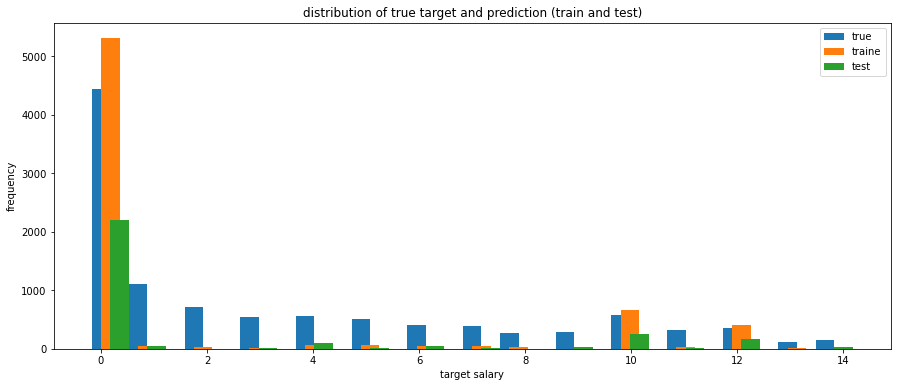

In [92]:
#plot the he distribution of true target variable values and their predictions on both the training set and test set
plt.figure(figsize = (15,6))  
true = selected_feature['Q24_Encoded']
train = train_predict
test = test_predict
plt.hist(true, align = 'left', label = 'true',bins=40)
plt.hist(train, align = 'mid', label = 'traine',bins=40)
plt.hist(test, align = 'right', label = 'test',bins=40)
plt.xlabel('target salary')
plt.ylabel('frequency')
plt.title('distribution of true target and prediction (train and test)')
plt.legend()
plt.show()

In [93]:
# compare the prediction accuracy with original model and final tunned model
original_model = LogisticRegression()
original_model.fit(Xs_train, ys_train)
original_acc = original_model.score(Xs_train,ys_train)

final_model = LogisticRegression(C = 0.4832930238571752, solver= 'newton-cg', penalty= 'l2')
final_model.fit(Xs_train, ys_train)
final_acc = final_model.score(Xs_train,ys_train)

print("with out model tuning, the prediction accuracy: ", original_acc)
print("with model tuning, the final prediction accuracy: ", final_acc)

with out model tuning, the prediction accuracy:  0.4408936233170587
with model tuning, the final prediction accuracy:  0.4411895250776742


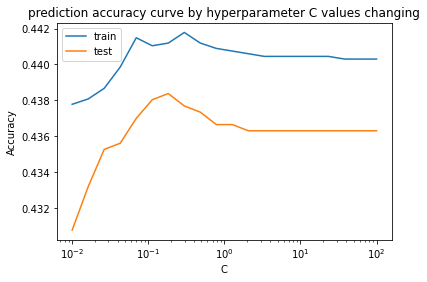

In [94]:
# Create a list of tunning value hyperparamether C
C_list = np.logspace(-2,2,20)
# Build a accuracy outcome array
accuracy = []

for C in C_list :
    log = LogisticRegression(C=C,penalty = 'l2',solver = 'newton-cg')
    log.fit(Xs_train, ys_train)
    
    predict_Xs_train = log.predict(Xs_train)
    predict_Xs_test = log.predict(Xs_test)
    
    train_accuracy = accuracy_score(ys_train, predict_Xs_train)
    test_accuracy = accuracy_score(ys_test, predict_Xs_test)
        
    accuracy.append((C, train_accuracy, test_accuracy))

accuracy_df = pd.DataFrame(accuracy, columns=["C", "train", "test"])

# plot the prediction accuracy curve by hyperparameter C values changing
plot = accuracy_df.plot(x="C", y=["train", "test"],  logx=True, title = 'prediction accuracy curve by hyperparameter C values changing')
plot.set_xlabel('C')
plot.set_ylabel('Accuracy')
plt.show()

<module 'matplotlib.pyplot' from 'C:\\app\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

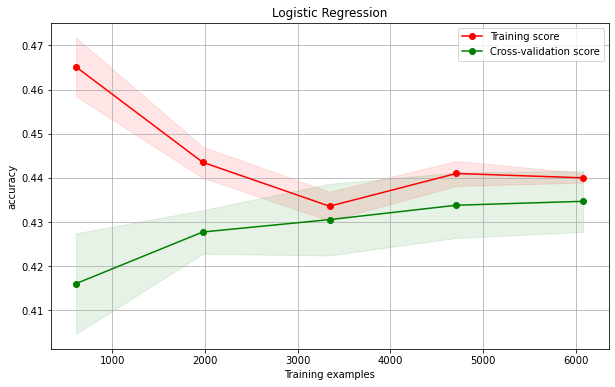

In [96]:
# plot the learning cureve which shoulds the how good the final tunned model do presiction
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt
plot_learning_curve(LogisticRegression(C = 0.4832930238571752, solver= 'newton-cg', penalty= 'l2'),'Logistic Regression', Xs_train, ys_train, cv=10)